# COMP0124 MAAI Individual Coursework 2024

This course work has 5 questions with 50 marks,

# Instructions
1.   To start this notebook, please duplicate this notebook at first:
  - Choose "File => Save a copy in Drive" and open/run it in Colab.
  - Or you can download the notebook and run it in your local jupyter notebook server.
2.   For the code-based problems, please create code shells after and write your code-based answers. For analysis and discussion or no-code answers, you are free to add extra text blocks as you need.
3. If you have any questions, please contact TAs:  [Oliver Slumbers](o.slumbers@cs.ucl.ac.uk), [Xihan Li](xihan.li.20@ucl.ac.uk), [Xidong Feng](xidong.feng@cs.ucl.ac.uk), and [Mengyue Yang](m.yang@cs.ucl.ac.uk).

------------------------------------------------------------------------

# Q1: Matrix Game (1)

Player 1 and 2 each choose a positive integer up to K (include K). If the players choose the same number, then

- player 2 pays **\$2** to player 1 if both of them choose 1
- player 2 pays **\$1** to player 1 if both of them choose an integer larger than 1

otherwise no payment is made. Each player's perferences are represented by her expected monetary payoff.

<div style='border: 1px solid; padding: 5px;'>
    
**(a)** When $K = 2$, write down the payoff matrix of the game, and steyp by step find any Nash equilibrum point. **[3 Marks]**

</div>

Let player 1 and player 2 adopt the mixed strategies $(p, 1-p)$ and $(q, 1-q)$ respectively, where $p, q \in [0, 1]$.

Consider player 1's expected payoff,
$$
    (2)(q) = (1)(1-q) \Rightarrow q = \frac{1}{3} .
$$
Hence, when $q = 1/3$, $(p, 1-p)$ is player 1's best response.

Consider player 2's expected payoff,
$$
    (-2)(p) = (-1)(1-p) \Rightarrow p = \frac{1}{3} .
$$
Hence, when $p = 1/3$, $(q, 1-q)$ is player 2's best response.

Therfore, the only nash equilibrium for this game when $K = 2$ is $\{(1/3, 2/3), (1/3, 2/3)\}$.

<div style='border: 1px solid; padding: 5px;'>

**(b)** Write a code using [NashPy](https://nashpy.readthedocs.io/en/stable/) to validate your results. **[2 Marks]**

</div>

In [1]:
import nashpy

def print_ne(equilibria):
    """Print Nash Equilibria with formats."""
    for n, eq in enumerate(equilibria, 1):
        print('-'*50 + f'\nNash Equilibrium {n}:\n' + '-'*50)
        print(f'Player 1: ({", ".join([f"{x:.3f}" for x in eq[0]])})')
        print(f'Player 2: ({", ".join([f"{x:.3f}" for x in eq[1]])})')

A = [[2, 0], [0, 1]]
B = [[-2, 0], [0, -1]]
game = nashpy.Game(A, B)
equilibria = game.support_enumeration()
print_ne(equilibria)

--------------------------------------------------
Nash Equilibrium 1:
--------------------------------------------------
Player 1: (0.333, 0.667)
Player 2: (0.333, 0.667)


<div style='border: 1px solid; padding: 5px;'>

**(c)** For any $K$, the game has a mixed strategy Nash equilibria. First write down the strategy, and then prove it is a Nash equilibria. **[3 Marks]**

</div>

The mixed strategy Nash equilibrium:
$$
    \left\{ \left( \frac{1}{2K-1}, \frac{2}{2K-1}, \cdots, \frac{2}{2K-1} \right), \left( \frac{1}{2K-1}, \frac{2}{2K-1}, \cdots, \frac{2}{2K-1} \right) \right\}.
$$

With this strategy, player 1's expected payoff:

- when choosing number 1: $2 \cdot \frac{1}{2K-1} + 0 + \cdots + 0 = \frac{2}{2K-1}$
- when choosing number > 1: $0 + \cdots + 0 + 1 \cdot \frac{2}{2K-1} + 0 + \cdots + 0 = \frac{2}{2K-1}$

Hence, if player 2 plays with the strategy $\left( \frac{1}{2K-1}, \frac{2}{2K-1}, \cdots, \frac{2}{2K-1} \right)$, any mixed strategy would be player 1's best response.

With this strategy, player 2's expected payoff:

- when choosing number 1: $-2 \cdot \frac{1}{2K-1} + 0 + \cdots + 0 = \frac{-2}{2K-1}$
- when choosing number > 1: $0 + \cdots + 0 + (-1) \cdot \frac{2}{2K-1} + 0 + \cdots + 0 = \frac{-2}{2K-1}$

Hence, if player 1 plays with the strategy $\left( \frac{1}{2K-1}, \frac{2}{2K-1}, \cdots, \frac{2}{2K-1} \right)$, any mixed strategy would be player 2's best response.

Thus, we conclude that
$$
    \left\{ \left( \frac{1}{2K-1}, \frac{2}{2K-1}, \cdots, \frac{2}{2K-1} \right), \left( \frac{1}{2K-1}, \frac{2}{2K-1}, \cdots, \frac{2}{2K-1} \right) \right\}.
$$
is a mixed strategy Nash equilibrium for the game.

<div style='border: 1px solid; padding: 5px;'>
    
**(d)** Show that the game has no other mixed strategy Nash equilibria. **[2 Marks]**

</div>

Assume there exists another mixed strategey Nash equilibrium:
$$
    \left\{ \left( A_1, A_2, \cdots, A_K \right), \left( B_1, B_2, \cdots, B_K \right) \right\}
$$
which is different from that in part (c). Note that $A_1, A_2, \cdots, A_K, B_1, B_2, \cdots, B_K \in [0, 1]$, $A_1 + A_2 + \cdots + A_K = 1$ and $B_1 + B_2 + \cdots + B_K = 1$.

The expected payoff of player 1 and 2 is given by:
$$
    (2B_1, B_2, \cdots, B_K)
$$
and
$$
    (-2A_1, -A_2, \cdots, -A_K)
$$
respectively.

For any $m \in \{1, \cdots, K\}$, if the probability of player 1 choosing $m$ is zero, i.e. $A_m = 0$, the best response of player 2 would be a pure strategy of choosing $m$, i.e. $B_m = 1$. In this case, the best response of player 1 is also a pure strategy of choosing $m$, i.e. $A_m = 1 \neq 0$. Hence, Nash equilibrium cannot be obtained if $A_m = 0 : \exists m \in \{1, \cdots, K\}$ and therefore $A_m \in (0, 1) : \forall m \in \{1, \cdots, K\}$ is necessary for a Nash equilibrium. Similary, $B_m \in (0, 1) : \forall m \in \{1, \cdots, K\}$ is necessary for a Nash equilibrium.

So, the Nash equilibrium has to satisfy,
$$
\begin{cases}
    A_1, A_2, \cdots, A_K < 1 \\
    A_1, A_2, \cdots, A_K > 0 \\
    B_1, B_2, \cdots, B_K < 1 \\
    B_1, B_2, \cdots, B_K > 0 \\
    A_1 + A_2 + \cdots + A_K = 1 \\
    B_1 + B_2 + \cdots + B_K = 1 \\
    2A_1 = A_2 = \cdots = A_K \\
    2B_1 = B_2 = \cdots = B_K \\
\end{cases}.
$$

Consider the last four constraints, we get the only solution to this system, which is the Nash equilibrium given in part (c). Thus, there is no other Nash equilibrium that is different from that in part (c).


-------------------------------------------

# Q2: Matrix Game (2)

Consider the matrix game given below

|   | B    | S    | X    |
|---|------|------|------|
| B | 4, 2 | 0, 0 | 0, 1 |
| S | 0, 0 | 2, 4 | 1, 3 |

<div style='border: 1px solid; padding: 5px;'>

**(a)** Write down the two pure strategy Nash equilibria of the game. **[1 marks]**

</div>

Pure strategy Nash equilibria:
1. {B, B}
2. {S, S}

<div style='border: 1px solid; padding: 5px;'>

**(b)** Use Python to draw the expected payoffs to player II (the column player) for all her strategies B, S and X, in terms of the probability $p$, say, that player I (the row player) plays strategy B. Indicate the best responses of player II, depending on that probability $p$. **[2 marks]**

</div>

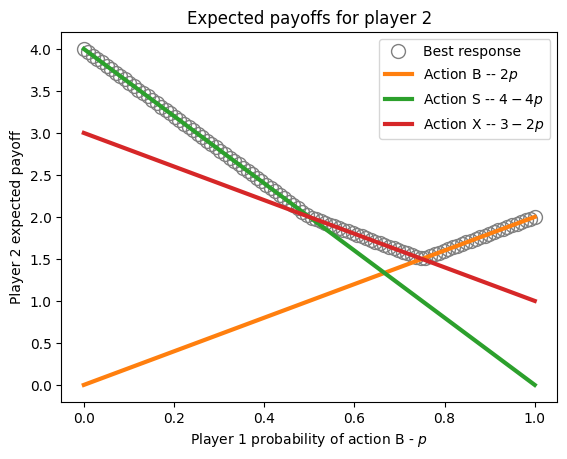

In [2]:
import numpy as np
import matplotlib.pyplot as plt

payoff_2 = np.array([
    [2, 0, 1],
    [0, 4, 3],
])
actions_2 = ['B', 'S', 'X']

probs = np.linspace(0, 1, 100)
expe_payoffs_2_eq = ['$2p$', '$4-4p$', '$3-2p$']
expe_payoffs_2 = payoff_2.T @ np.stack([probs, 1-probs])
best_response_2 = np.max(expe_payoffs_2, axis=0)
plt.plot(probs, best_response_2, 'o', mec='gray', mew=1, mfc='none', ms=10, label='Best response')
for i, action in enumerate(actions_2):
    plt.plot(probs, expe_payoffs_2[i], lw=3, label=f'Action {action} -- {expe_payoffs_2_eq[i]}')
plt.title('Expected payoffs for player 2')
plt.xlabel('Player 1 probability of action B - $p$')
plt.ylabel('Player 2 expected payoff')
plt.legend();

<div style='border: 1px solid; padding: 5px;'>
    
**(c)** Using the diagram in (b), find another mixed equilibria of the game. **[2 marks]**

</div>

Each intersection of curves that **lies on the best response curve** corresponds to a possible mixed Nash equilibrium of the game.

At $p = 1/2$ (intersection between green and red curves), player 2's best response is $(0, q, 1-q)$ where $q \in [0, 1]$. The expected payoff of player 1 is therefore $(1-q, q+3)$. As $q+3 > 1-q$, player 1's best response is a pure strategy of choosing action S. So, no Nash equilibrium for $p = 1/2$.

At $p = 3/4$ (intersection between red and orange curves), player 2's best response is $(q, 0, 1-q)$ where $q \in [0, 1]$. The expected payoff of player 1 is therefore $(4q, 1-q)$. When $q = 1/5$, $(p, 1-p) : \forall p \in [0, 1]$ is player 1's best response. Hence,
$$
    \left\{ \left(\frac{3}{4}, \frac{1}{4} \right), \left(\frac{1}{5}, 0, \frac{4}{5} \right) \right\}
$$
is a mixed Nash equilibrium of the game.

<div style='border: 1px solid; padding: 5px;'>

**(d)** Implement the support enumuration method to validate your result in (a) and (c). **[3 marks]**

</div>

In [3]:
### Support enumeration algorithm modified from the function provided in Lab 3.

import itertools

def support_enumeration(R, C):
    """Return the Nash equilibria of a non-degenerate 2-player game (R, C)
    using the support enumeration algorithm.

    Args:
        R (ndarray): The payoff matrix for row player.
        C (ndarray): The payoff matrix for column player.

    Returns:
        list: List of Nash equilibria. [(row player's mixed strategy,
                                         column player's mixed strategy)]
    """
    assert R.shape == C.shape
    m, n = R.shape
    ne = []
    for k in range(1, min(m, n) + 1):
        for I in itertools.combinations(range(m), k):
            for J in itertools.combinations(range(n), k):
                I, J = np.array(I), np.array(J)
                r_subset, c_subset = R[np.ix_(I, J)], C[np.ix_(I, J)]
                r_constraint = np.block([[c_subset.T, -np.ones((k, 1))],       # Expected payoff for row player
                                        [np.ones((1, k)), np.zeros((1, 1))]])  # Probabilities sum to 1
                c_constraint = np.block([[r_subset, -np.ones((k, 1))],         # Expected payoff for column player
                                        [np.ones((1, k)), np.zeros((1, 1))]])  # Probabilities sum to 1
                b = np.append(np.zeros(k), 1)
                r_support_probs = np.linalg.solve(r_constraint, b)[:-1]
                c_support_probs = np.linalg.solve(c_constraint, b)[:-1]
                r_probs, c_probs =  np.zeros(m), np.zeros(n)
                r_probs[I], c_probs[J] = r_support_probs, c_support_probs

                # Probabilities must be non-negative
                if np.all(r_probs >= 0) and np.all(c_probs >= 0):
                    r_expected_payoff = c_probs @ R.T
                    c_expected_payoff = r_probs @ C
                    # Best response condition
                    if np.isclose(r_expected_payoff[I[0]], r_expected_payoff.max()) and \
                    np.isclose(c_expected_payoff[J[0]], c_expected_payoff.max()):
                        ne.append((r_probs, c_probs))
    return ne

In [4]:
### Verify the answer in part 2(a) and 2(c)
A = np.array([
    [4, 0, 0],
    [0, 2, 1],
])
B = np.array([
    [2, 0, 1],
    [0, 4, 3],
])
equilibria = support_enumeration(A, B)
print_ne(equilibria)

--------------------------------------------------
Nash Equilibrium 1:
--------------------------------------------------
Player 1: (1.000, 0.000)
Player 2: (1.000, 0.000, 0.000)
--------------------------------------------------
Nash Equilibrium 2:
--------------------------------------------------
Player 1: (0.000, 1.000)
Player 2: (0.000, 1.000, 0.000)
--------------------------------------------------
Nash Equilibrium 3:
--------------------------------------------------
Player 1: (0.750, 0.250)
Player 2: (0.200, 0.000, 0.800)


Hence, results in parts (a) and (c) are valid.

<div style='border: 1px solid; padding: 5px;'>

**(e)** How can you improve the efficiency of the support enumeration method, by adopting the idea of the diagram in (b)? Briefly introduce the idea (no code needed). **[2 mark]**

</div>

In the support enumeration method, it searches from every possible combination of the players' strategies and tests if the combination can fulfill all constraints. Adopting the idea of the diagram in part (b), we can test for fewer points. Instead of testing every possible combinations of strategies, one can just tests those vertices that **lie on the best response curve**. For linear programming problems with more constraints, this method greatly reduces the computational complexity.

------------------------------------------------------------------------

# Q3: Repeated Game

Consider the following repeated game setting where the stage normal form game's payoff matrix is

|   | C    | D    |
|---|------|------|
| C | 3, 3 | 0, 5 |
| D | 5, 0 | 2, 2 |

<div style='border: 1px solid; padding: 5px;'>

**(a)** Recall the grim trigger, the limited punishment and the tit-for-tat policy mentioned in our lecture and practical session. By using the code from our practical seesion, please conduct pair-wise policy comparisons among these three policies as well as an all-defection policy (aka defect all the time). Show the comparison matrix (4\*4). Set the limited punishment parameter k as 2, discount factor as 0.95, max_step as 100. **[2 Marks]**

</div>

In [5]:
### Agents' classes that are mostly modified from examples provided in Lab 2.
### Actions of agents are indexed as 0 and 1, referring to 'C' and 'D' respectively.


class RepeatedGame:

    def __init__(self, payoff1, payoff2, max_step):
        self.payoff1 = payoff1
        self.payoff2 = payoff2
        self.max_step = max_step
        self.reset()

    def reset(self):
        self.curr_step = 0
        self.history = {0: [], 1: []}
        return self.history

    def step(self, action1, action2):
        reward1 = self.payoff1[action1, action2]
        reward2 = self.payoff2[action1, action2]
        self.history[0].append(action1)
        self.history[1].append(action2)
        self.curr_step += 1
        done = False
        if self.curr_step == self.max_step:
            done = True
        return reward1, reward2, self.history, done


class BaseAgent:

    def __init__(self, idx):
        self.idx = idx  # Agent index


class GrimTriggerAgent(BaseAgent):

    def next_action(self, history):
        opponent_actions = history[1 - self.idx]
        if 1 in opponent_actions:
            return 1  # Defect (punish)
        else:
            return 0  # Confess (cooperate)


class TitForTatAgent(BaseAgent):

    def next_action(self, history):
        opponent_actions = history[1 - self.idx]
        if opponent_actions:
            return opponent_actions[-1]  # Imitate opponent's last action
        else:
            return 0  # Cooperte at the first step


class LimitedPunishmentAgent(BaseAgent):

    def __init__(self, idx, k=2):
        super().__init__(idx)
        self.k = k
        self.punishment = 0

    def next_action(self, history):
        opponent_actions = history[1 - self.idx]
        if opponent_actions:
            # Still punishing
            if self.punishment > 0:
                self.punishment -= 1
                if self.punishment == 0:
                    # Cooperate after punishment
                    return 0
                else:
                    return 1
            # Check if opponent cooperated
            if opponent_actions[-1] == 0:
                return 0
            else:
                self.punishment = self.k
                return 1
        else:
            # Cooperate at the first step
            return 0


class AllDefectAgent(BaseAgent):

    def next_action(self, history):
        return 1  # Defect


def discount_return(reward_list, discount):
    return_seq = np.ones(len(reward_list))
    for i in range(1, len(reward_list)):
        return_seq[i] = return_seq[i-1] * discount
    return np.sum(np.array(reward_list) * return_seq)


def simulate(env, agent0, agent1, discount):
    history = env.reset()
    done = False
    reward_list_0, reward_list_1 = [], []
    while not done:
        action0 = agent0.next_action(history)
        action1 = agent1.next_action(history)
        reward0, reward1, history, done = env.step(action0, action1)
        reward_list_0.append(reward0)
        reward_list_1.append(reward1)
    return0 = discount_return(reward_list_0, discount)
    return1 = discount_return(reward_list_1, discount)
    return return0, return1


def print_comparison(agent_names, comparison_matrix):
    max_name_len = max([len(name) for name in agent_names]) + 2
    print('Return of the row player:')
    print(' '.rjust(max_name_len) + ''.join([x.rjust(max_name_len) for x in agent_names]) + '')
    for i, row in enumerate(comparison_matrix):
        output = f'{agent_names[i]}'.rjust(max_name_len)
        output += ''.join([f'{x:.5f}'.rjust(max_name_len) for x in row])
        print(output)


agents = [
    ('GrimTrigger', GrimTriggerAgent),
    ('LimitedPunish', LimitedPunishmentAgent),
    ('TitForTat', TitForTatAgent),
    ('AllDefect', AllDefectAgent),
]
agent_names = [name for name, _ in agents]

# Game Settings
payoff1 = np.array([[3, 0], [5, 2]])
payoff2 = np.array([[3, 5], [0, 2]])
discount = 0.95
max_step = 100
env = RepeatedGame(payoff1, payoff2, max_step)

comparison_matrix = np.zeros((len(agents), len(agents)))
for i, (_, agent0) in enumerate(agents):
    for j, (_, agent1) in enumerate(agents):
        return0, return1 = simulate(env, agent0(idx=0), agent1(idx=1), discount)
        comparison_matrix[i, j] = return0

print_comparison(agent_names, comparison_matrix)

Return of the row player:
                   GrimTrigger  LimitedPunish      TitForTat      AllDefect
    GrimTrigger       59.64477       59.64477       59.64477       37.76318
  LimitedPunish       59.64477       59.64477       59.64477       25.81532
      TitForTat       59.64477       59.64477       59.64477       37.76318
      AllDefect       42.76318       60.68497       42.76318       39.76318


<div style='border: 1px solid; padding: 5px;'>

**(b)** Considering an agent with a mixed policy: the agent starts (step 1) with the grim trigger policy. After every 5 steps (step 6,11,16,etc) it will reset and choose to swtich its policy. For example, if its current policy is the grim trigger, it has probability of 1/4 for staying the same policy, 1/4 for choosing limited punishment policy, 1/4 for choosing the tit-for-tat policy, and 1/4 for choosing the defection policy. Find a strategy that can beat this mixed agent (the cumulative return is larger than the mixed agent). Please implement the above mixed agent, and implement your strategy (and also explain why) and conduct simulation comparison between your strategy and the mixed agent. Set discount factor as 0.9.  **[3 Marks]**

**Note: When the agent is the under punishment situation, the agent can also switch its policy. For the limited punishment policy, once it is switched to another one, all punishment-relevant statistics need to be reset.**

</div>

A very simple strategy to beat the mixed agent is **always defect**. Intuitively, since all potential stategy of the mixed strategy agent may choose **C**, the All-Defect agent would have chance to gain more payoff as it always choose **D**. When the mixed strategy agent choose **D**, both agents received the same payoff. Hence, the always defect strategy is at least as good as each potential strategy of the mixed agent.

1. **All-Defect vs Grim Trigger**
   
    The Grim Trigger agent would choose **C** in the 1st round and choose **D** in remaining rounds to punish the All-Defect agent. The cumulative returns are

   - All-Defect agent's return $= 5 + (0.9) \cdot 2 + (0.9)^2 \cdot 2 + (0.9)^3 \cdot 2 + (0.9)^4 \cdot 2 = 11.190$

   - Grim Trigger agent's return $= 0 + (0.9) \cdot 2 + (0.9)^2 \cdot 2 + (0.9)^3 \cdot 2 + (0.9)^4 \cdot 2 = 6.190$

2. **All-Defect vs Limited Punishment($k = 2$)**

    The Limited Punishment agent would choose **C** in the 1st round and choose **D** in the 2nd and 3rd rounds to punish the All-Defect agent. Then, it would choose **C** in the 4th round and **D** in the 5th round to punish the All-Defect agent again. The cumulative returns are

   - All-Defect agent's return $= 5 + (0.9) \cdot 2 + (0.9)^2 \cdot 2 + (0.9)^3 \cdot 5 + (0.9)^4 \cdot 2 = 13.378$

   - Limited Punishment agent's return $= 0 + (0.9) \cdot 2 + (0.9)^2 \cdot 2 + (0.9)^3 \cdot 0 + (0.9)^4 \cdot 2 = 4.732$

3. **All-Defect vs Tic-for-Tat**

    The Tic-for-Tat agent would choose **C** in the 1st round and choose **D** in the remaining rounds to imitate the All-Defect agent. The cumulative returns are

   - All-Defect agent's return $= 5 + (0.9) \cdot 2 + (0.9)^2 \cdot 2 + (0.9)^3 \cdot 2 + (0.9)^4 \cdot 2 = 11.190$

   - Tic-for-Tat agent's return $= 0 + (0.9) \cdot 2 + (0.9)^2 \cdot 2 + (0.9)^3 \cdot 2 + (0.9)^4 \cdot 2 = 6.190$

4. **All-Defect vs All-Defect**

    Both agents always choose **D**. Hence, having the same return

   - All-Defect agent's return $= 2 + (0.9) \cdot 2 + (0.9)^2 \cdot 2 + (0.9)^3 \cdot 2 + (0.9)^4 \cdot 2 = 8.190$

Therefore, in all cases
$$
    \text{All-Defect agent's return} \geq \text{Mixed agent's return}
$$


In [6]:
class MixedAgent(BaseAgent):

    def __init__(self, idx, change_steps=5):
        super().__init__(idx)
        self.change_steps = change_steps
        self.agent_choices = [
            GrimTriggerAgent,
            TitForTatAgent,
            LimitedPunishmentAgent,
            AllDefectAgent
        ]
        self.reset()

    def reset(self):
        self.steps_remain = self.change_steps
        # Start with the Grim Trigger Strategy
        self.agent = GrimTriggerAgent(self.idx)
        self.curr_agent = 0  # Index in self.agent_choices

    def next_action(self, history):
        # Can only see history in current agent's steps
        history_size = self.change_steps - self.steps_remain
        period_hist = {
            0: [history[0][i] for i in range(-history_size, 0)],
            1: [history[1][i] for i in range(-history_size, 0)],
        }
        # Re-sample an agent every 5 steps
        if self.steps_remain > 0:
            self.steps_remain -= 1
            return self.agent.next_action(period_hist)
        else:
            self.steps_remain = self.change_steps
            next_agent = np.random.randint(len(self.agent_choices))
            self.agent = self.agent_choices[next_agent](self.idx)
            self.curr_agent = next_agent
            return self.agent.next_action(period_hist)


class MyAgent(AllDefectAgent):
    pass


# Game Settings
payoff1 = np.array([[3, 0], [5, 2]])
payoff2 = np.array([[3, 5], [0, 2]])
discount = 0.9
max_step = 100
env = RepeatedGame(payoff1, payoff2, max_step)

total_return_0 = 0
total_return_1 = 0

runs = 1000
for _ in range(runs):
    agent0 = MixedAgent(idx=0)
    agent1 = MyAgent(idx=1)
    return0, return1 = simulate(env, agent0, agent1, discount)
    total_return_0 += return0
    total_return_1 += return1

msg = f'Average return of agents in a {max_step} steps game over {runs} run'
print('-' * len(msg) + '\n' + msg + '\n' + '-' * len(msg))
print(f'MixedAgent : {total_return_0 / runs:.4f}')
print(f'MyAgent    : {total_return_1 / runs:.4f}')

----------------------------------------------------------
Average return of agents in a 100 steps game over 1000 run
----------------------------------------------------------
MixedAgent : 15.8398
MyAgent    : 26.2390


<div style='border: 1px solid; padding: 5px;'>
    
**(c)** You need to either find the best policy (optimal cumulative reward) or iteratively improve your implemented policy (increase cumulative reward) against the mixed agent mentioned in (b). The term 'iteratively' means you need to illustrate that your method can gradually refine its policy over time. Also, analyze how the peformance and comparison between these two policies change with different discount factor. **[5 Marks]**

**Hints: This is an open question and you can design any algorithm that can solve it. We offer several possbilities here but you are not limited to these methods. You can try to parameterize your policy and use (1) Grid-Search over parameters (2) Evolutionary strategy similar to [Genetic_algorihtm](https://en.wikipedia.org/wiki/Genetic_algorithm) (3) Reinforcement Learning to optimize the parameterized policy. You can also try to derive the optimal policy analytically for this game and provide your discussion.**

</div>

**Simple Q Learning Agent**

In this part, a very simple Q learning agent is created. The agent takes the past 5 moves of itself and the opponent as the state of the environment. It maintains a Q-table for storing the expected Q-value $Q$ of each $\text{(state, action)}$ pair. The state space has a size of 1364 and the action space has only 2 actions.

*$\epsilon$-Greedy Policy*

The agent uses the $\epsilon$-greedy policy, where a exloration rate $\epsilon$ decay across episodes according to the following update rule:
$$
    \epsilon \leftarrow \epsilon_\text{min} + (\epsilon_\text{max} - \epsilon_\text{min}) \exp({-\epsilon_\text{decay} \cdot n_\text{episode}})
$$
where $\epsilon_\text{max}$ is the initial value of the exploration rate, $\epsilon_\text{min}$ is the minimum value of the exploration rate, $\epsilon_\text{decay}$ is the rate of decay and $n_\text{epsisode}$ is the current number of episodes.

*Off-policy TD Q-learning*

The Q-table is updated after receiving every reward and the new state according to the following update rule:
$$
    Q(s, a) \leftarrow Q(s, a) + \alpha [r + \gamma \max_{a'} Q(s', a') - Q(s, a)]
$$
where $s$ is the original state, $s'$ is the new state, $a$ is the selected action, $r$ is the reward received, $\alpha$ is the learning rate and $\gamma$ is the discount on reward.

Discount factor: 0.9

Average return in last 1000 TRAINING episodes
Mixed Agent: 20.2383
QL Agent   : 28.4344
QL win rate: 100.000%

Average return in 1000 TESTING episodes
Mixed Agent: 19.9435
QL Agent   : 28.6809
QL win rate: 100.000%


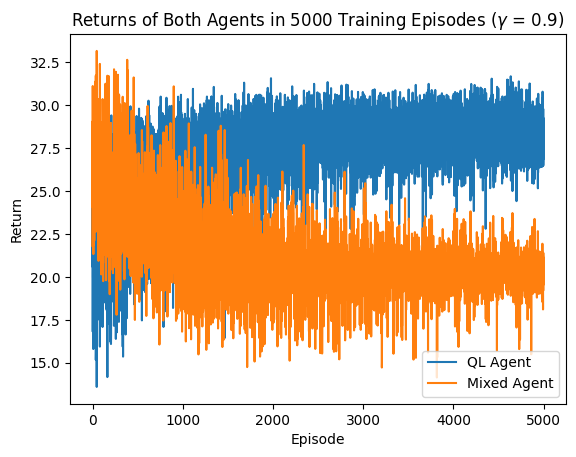

In [7]:
#----------------------------------------------------------------------
# Simple Q-Learning
#----------------------------------------------------------------------
# Using the previous 5 actions of both players as the state. Actions
# 'C' and 'D' are represented by 0 and 1 respectively. If current game
# step is less than 5, there would be less then 5 previous actions, the
# remaining actions is represented by 2. Hence, a state would look like
# {'self': [2, 2, 0, 1, 1], 'opponent': [2, 2, 1, 0, 0]}, where the
# actions are order by ascending time step.
#
# Size of state space = 1           [starting round of the game]
#                       + (2^1)^2   [2nd round of the game]
#                       + (2^2)^2   [3rd round of the game]
#                       + (2^3)^2   [4th round of the game]
#                       + (2^4)^2   [5th round of the game]
#                       + (2^5)^2   [other rounds of the game]
#                     = 1364
#----------------------------------------------------------------------


from collections import defaultdict


class QLearningAgent:

    def __init__(self, idx, discount=0.9):
        self.idx = idx
        self.actions = [0, 1]
        self.lr = 0.1  # Learning rate
        self.er_max = 1  # Max exploration rate
        self.er_min = 0.01  # Min exploration rate
        self.er_decay = 0.001  # Exponential decay rate
        self.discount = discount  # Discount on future rewards
        self.past_window = 5  # Number of past actions as state
        self.reset()

    def reset(self):
        self.er = self.er_max  # Exploration rate
        self.Q = defaultdict(lambda: np.zeros(2))  # {state: [action 0 q, action 1 q]}

    def hist2state(self, hist):
        """Get the state from the history."""
        self_state = [2] * self.past_window
        oppo_state = [2] * self.past_window
        self_hist = hist[self.idx][-self.past_window:]
        oppo_hist = hist[1 - self.idx][-self.past_window:]
        # If the game has started
        if len(self_hist):
            self_state[-len(self_hist):] = self_hist
            oppo_state[-len(oppo_hist):] = oppo_hist
        state = tuple(self_state + oppo_state)
        return state

    def next_action(self, hist):
        self.state = self.hist2state(hist)
        er_thres = np.random.rand()
        if er_thres > self.er:
            # Exploitation
            self.action = np.argmax(self.Q[self.state])
        else:
            # Exploration
            self.action = np.random.choice(self.actions)
        return self.action

    def Q_update(self, new_hist, reward):
        """Off-policy TD Q Learning"""
        new_state = self.hist2state(new_hist)
        self.Q[self.state][self.action] = self.Q[self.state][self.action] * (1 - self.lr) \
            + self.lr * (reward + self.discount * self.Q[new_state].max())

    def decay_er(self, episode):
        """Exponential decay the exploration rate after each episode."""
        self.er = self.er_min + (self.er_max - self.er_min) * np.exp(-self.er_decay * episode)


def ql_train(env, ql_agent, mixed_agent, discount=0.9, n_episode=5000):
    """Training loop for the Q learning agent. """
    ql_agent.reset()
    ql_returns = np.zeros(n_episode)
    mixed_returns = np.zeros(n_episode)

    for episode in range(n_episode):
        mixed_agent.reset()
        hist = env.reset()
        done = False
        ql_rewards, mixed_rewards = [], []

        while not done:
            ql_action = ql_agent.next_action(hist)
            mixed_action = mixed_agent.next_action(hist)
            ql_r, mixed_r, hist, done = env.step(ql_action, mixed_action)
            ql_rewards.append(ql_r)
            mixed_rewards.append(mixed_r)
            ql_agent.Q_update(hist, ql_r)

        ql_returns[episode] = discount_return(ql_rewards, discount)
        mixed_returns[episode] = discount_return(mixed_rewards, discount)
        ql_agent.decay_er(episode+1)

    return ql_returns, mixed_returns


# Game Settings
payoff1 = np.array([[3, 0], [5, 2]])
payoff2 = np.array([[3, 5], [0, 2]])
discount = 0.9
max_step = 100
env = RepeatedGame(payoff1, payoff2, max_step)

# Training
n_episode = 5000
ql_agent = QLearningAgent(idx=0, discount=discount)
mixed_agent = MixedAgent(idx=1)
ql_returns, mixed_returns = ql_train(env, ql_agent, mixed_agent, discount, n_episode)

# Training Returns Plot
plt.plot(np.arange(n_episode), ql_returns, label='QL Agent')
plt.plot(np.arange(n_episode), mixed_returns, label='Mixed Agent')
plt.xlabel('Episode')
plt.ylabel('Return')
plt.title(f'Returns of Both Agents in {n_episode} Training Episodes ($\gamma$ = {discount})')
plt.legend()

# Result Statistics
print(f'Discount factor: {discount}')
print()
print(f'Average return in last 1000 TRAINING episodes')
print(f'Mixed Agent: {mixed_returns[-1000:].mean():.4f}')
print(f'QL Agent   : {ql_returns[-1000:].mean():.4f}')
print(f'QL win rate: {np.mean(ql_returns[-1000:] > mixed_returns[-1000:]):.3%}')
print()

# Testing
runs = 1000
ql_returns = np.zeros(1000)
mixed_returns = np.zeros(1000)
ql_agent.er = 0  # Always exploit

for run in range(runs):
    mixed_agent.reset()
    return0, return1 = simulate(env, ql_agent, mixed_agent, discount)
    ql_returns[run] = return0
    mixed_returns[run] = return1

print(f'Average return in 1000 TESTING episodes')
print(f'Mixed Agent: {mixed_returns.mean():.4f}')
print(f'QL Agent   : {ql_returns.mean():.4f}')
print(f'QL win rate: {np.mean(ql_returns[-1000:] > mixed_returns[-1000:]):.3%}')

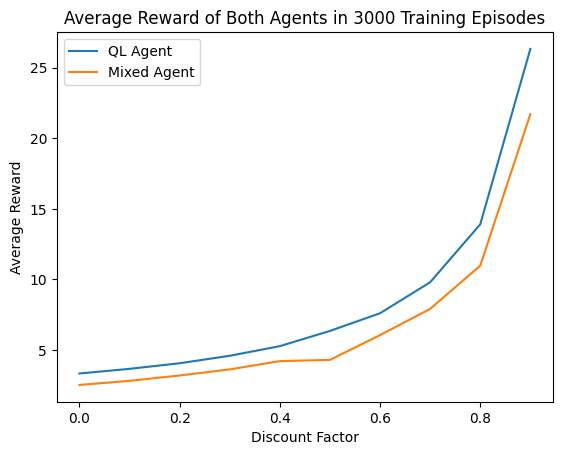

In [22]:
### Varies the Discount Factor of the Q-learning Agent

discounts = np.linspace(0, 0.9, 10)

# Game Settings
payoff1 = np.array([[3, 0], [5, 2]])
payoff2 = np.array([[3, 5], [0, 2]])
max_step = 100
env = RepeatedGame(payoff1, payoff2, max_step)

n_episode = 3000
ql_agent = QLearningAgent(idx=0, discount=0.9)
mixed_agent = MixedAgent(idx=1)

ql_avg_rewards = []
mixed_avg_rewards = []

for n, discount in enumerate(discounts):
    # Training
    ql_returns, mixed_returns = ql_train(env, ql_agent, mixed_agent, discount, n_episode)
    # Average reward plot data
    ql_avg_rewards.append(ql_returns.mean())
    mixed_avg_rewards.append(mixed_returns.mean())

plt.plot(discounts, ql_avg_rewards, label='QL Agent')
plt.plot(discounts, mixed_avg_rewards, label='Mixed Agent')
plt.xlabel('Discount Factor')
plt.ylabel('Average Reward');
plt.title(f'Average Reward of Both Agents in {n_episode} Training Episodes')
plt.legend();

--------------------------------------------------------------------------------

# Q4 Congestion Games
Consider the following congestion network with origin and destination
nodes 𝑜 and 𝑑, and an intermediate node 𝑣. There are ten individual users
who want to travel from 𝑜 to 𝑑. x, y, z, and y-z are the users in their respective paths.

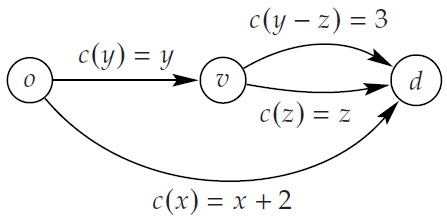

As shown, the cost on the bottom edge is 𝑐(𝑥) = 𝑥 + 2 when it has 𝑥 users, where 𝑥 + 𝑦 = 10. The edge from 𝑜 to 𝑣 has cost function 𝑐(𝑦) = 𝑦. The top edge from 𝑣 to 𝑑 has constant cost 3, and the lower edge from 𝑣 to 𝑑 has cost function 𝑐(𝑧) = 𝑧 if 𝑧 of the 𝑦 users use that edge, where 0 ≤ 𝑧 ≤ 𝑦.

<div style='border: 1px solid; padding: 5px;'>
    
**(a)** Find all equilibria of this congestion game (note that 𝑥, 𝑦 and 𝑧 are integers), and their resulting average cost per user. **[5 Marks]**

</div>

Constraint for the equilibria in this congestion game:

- (1) Integer users:
  $$x, y \in \mathbb{Z}^+$$

- (2) Total users:
  $$x + y = 10$$

- (3) Cost after changing paths at equilibrium is **not lower** (Therefore, no intention for any user to switch between the two edges from $o$ or the two edges from $v$.)
  - (3.1) Switching between the two edges from $o$
    $$
    \begin{cases}
        x + 2 \leq (y + 1) + \min(z', 3) & \text{(one moving from bottom edge to top edge} \\
        (x + 1) + 2 \geq y + \min(z, 3) & \text{(one moving from top edge to bottom edge}
    \end{cases}
    $$
   where $z'$ is the number of users in the lower edge from $v$ to $d$ after one moving from bottom to top.

  - (3.2) Switching between the two edges from $v$
    $$
    \begin{cases}
        y + z \leq y + 3 & \text{(one moving from bottom edge to top edge} \\
        y + 3 \leq y + (z + 1) & \text{(one moving from top edge to bottom edge}
    \end{cases}
    $$

Constraint (3.1) can be broken down by the value of $y$ as:

  - For $0 \leq y < 2$,
$$
    z, z' \leq 3
    \Rightarrow
    \begin{cases}
        z' = y + 1 \\
        z = y
    \end{cases}
    \Rightarrow
    \begin{cases}
        x \leq 2y \\
        x \geq 2y - 3
    \end{cases} .
$$
    Combining with constraint (2), we obtain
$$
    \begin{cases}
        10 - y \leq 2y \\
        10 - y \geq 2y - 3
    \end{cases}
    \Rightarrow
    3.33 \leq y \leq 4.33 \quad,
$$
    which **contradicts** with $0 \leq y < 2$.

  - For $2 \leq y < 3$,
$$
    \begin{cases}
        z' = 3 \\
        z  = y
    \end{cases}
    \Rightarrow
    \begin{cases}
        x \leq y + 2 \\
        x \geq 2y - 3
    \end{cases} .
$$
Combining with constraint (2), we obtain
$$
    \begin{cases}
        10 - y \leq y + 2 \\
        10 - y \geq 2y - 3
    \end{cases}
    \Rightarrow
    4 \leq y \leq 4.33 \quad ,
$$
which **contradicts** with $2 \leq y < 3$.

  - For $3 \leq y \leq 10$,
$$
    \begin{cases}
        z' = 3 \\
        z  = 3
    \end{cases}
    \Rightarrow
    \begin{cases}
        x \leq y + 2 \\
        x \geq y
    \end{cases} .
$$
Combining with constraint (2), we obtain
$$
    \begin{cases}
        10 - y \leq y + 2 \\
        10 - y \geq y
    \end{cases}
    \Rightarrow
    4 \leq y \leq 5 \quad .
$$
As $y$ is an integer, it can only be $4$ or $5$.

Constraint (3.2) can be reduced as:
$$
    \begin{cases}
        y + z \leq y + 3 \\
        y + 3 \leq y + (z + 1)
    \end{cases}
    \Rightarrow
    \begin{cases}
        z \leq 3 \\
        3 \leq z + 1
    \end{cases}
    \Rightarrow
    2 \leq z \leq 3
$$
As $z$ is an integer, it can only be $2$ or $3$.

Hence, there are 4 equilibria:

1. $(x, y, z) = (6, 4, 2)$
   $$
        \text{Resulting average cost per user } = \frac{6(6+2) + 2(4+3) + 2(4+2)}{10} = 7.4
   $$

2. $(x, y, z) = (6, 4, 3)$
   $$
        \text{Resulting average cost per user } = \frac{6(6+2) + 4(4+3)}{10} = 7.6
   $$
    
3. $(x, y, z) = (5, 5, 2)$
   $$
        \text{Resulting average cost per user } = \frac{5(5+2) + 3(5+3) + 2(5+2)}{10} = 7.3
   $$

4. $(x, y, z) = (5, 5, 3)$
   $$
        \text{Resulting average cost per user } = \frac{5(5+2) + 5(5+3)}{10} = 7.5
   $$

<div style='border: 1px solid; padding: 5px;'>
    
**(b)** For the same network, find the equilibrium when 𝑥, 𝑦, 𝑧 can be fractional for a total flow of 10 from 𝑜 to 𝑑 (so this flow is now splittable). Compare its average cost with the costs of the equilibria in (a). **[5 Marks]**

</div>

If $x$, $y$ and $z$ can be fractional, we have the constraint (3) rewritten as
$$
    \begin{cases}
        x + 2 \leq (y + k) + \min(z', 3) & (k \text{ moving from bottom to top)} \\
        (x + k') + 2 \geq y + \min(z, 3) & (k' \text{ moving from top to bottom)}
    \end{cases}
$$
where $0 < k \leq x$ and $0 < k' \leq y$. These lower bound on $k$ and $k'$ suggest that the equalities are essential for any equlibrium. Hence, the constraint reduces to
$$
    x + 2 = y + \min(z, 3)
$$

It can be broken down by the value of $y$ as:

  - For $0 \leq y < 3$,
$$
    z = y
    \Rightarrow
    x = 2y - 2
$$
Combining with constraint (2), we obtain
$$
    10 - y = 2y - 2
    \Rightarrow
    y = 4
    \quad ,
$$
which **contradicts** with $0 \leq y < 3$.

  - For $3 \leq y \leq 10$,
$$
    z = 3
    \Rightarrow
    x = y + 1
$$
Combining with constraint (2), we obtain
$$
    10 - y = y + 1
    \Rightarrow
    y = 4.5
    \quad .
$$
    
Therefore, the equilibrium would be
$$
    (x, y, z) = (5.5, 4.5, 3)
$$
with
$$
    \text{Resulting average cost per user } = \frac{5.5(5.5+2) + 4.5(4.5+3)}{10} = 7.5 \quad .
$$

The average cost per user is the higher that 2 other equilibria in part (a). It shows a situation that when every user pays the same cost, the entire society indeed spends more than the case when some users bare more cost.

-----------------------------------------

# Q5 Bertrand model of oligopoly

The Bertrand model of oligopoly models a market situation in which firms (agents) compete solely on price. It assumes that each firm is a price-taker and that the market price is determined by the lowest price offered by any of the firms. The Bertrand model of oligopoly is a game of sequential moves, in which firms (agents) choose their prices first, and then the consumers choose the firm they want to buy from.

For example, consider a market with two firms (agents) selling a **homogeneous good**. Both firms have the same cost structure, and both can produce any quantity at the same cost. In this case, the market price is determined by the lowest price offered by either firm. **If one firm offers a lower price, it will capture all the market *demand*, and the other firm will not sell any units.** The game is played as follows:

1. Both firms simultaneously choose a price.
2. Given the prices, each firm's profit is calculated based on the market share it captures.
3. The firms revise their prices based on the profits they received
4. The process 1-3 repeat until it convergences to a Nash equilibrium.


<div style='border: 1px solid; padding: 5px;'>

**(a)** We consider the following parameter setting for a two firms case, then we have the following notations:

* Players: Two firms $i=1,2$ with constant marginal cost $c\geq0$
* Strategic Variables: Firm’s select the price level $p_1, p_2 \geq 0$;
* Market Demand $d(p_i)$, which is determined by the price.

We can derive the demand function $D_{1}$ for Firm 1 given the price $p_1, p_2$ as:

$$
D_{1}\left(p_1, p_2\right)= \begin{cases}d\left(p_1\right), & \text { if } p_1<p_2 \\ \frac{d\left(p_1\right)}{2}, & \text { if } p_1=p_2 \\ 0, & \text { otherwise }\end{cases}
$$

Also the demand function $D_{2}$ for Firm 2 given the price $p_1, p_2$ as:

$$
D_{2}\left(p_1, p_2\right)= \begin{cases}d\left(p_2\right), & \text { if } p_2<p_1 \\ \frac{d\left(p_2\right)}{2}, & \text { if } p_2=p_1 \\ 0, & \text { otherwise }\end{cases}
$$

The reward function for both company can be calculated by:
$$
R_{i}= D_{i}(p_i - c)
$$

Assume that
$$
d(p_i)= \begin{cases}5-p_i, & \text { if } p_i<5 \\ 0, & \text { if } p_i\geq 5 \\\end{cases}
$$
and $c_1=c_2=1.0$. Given these parameters, you need to derive the best response price $p_1$ for firm 1 given the price $p_2$ analytically. The price value can only have one decimal place, such as 4.3, 4.4, and 4.5.  **[2 marks]**

</div>

Given the parameters, we can construct the reward of firm 1 as
$$
	\begin{align*}
		R_1 & =
		\begin{cases}
			(5 - p_1)(p_1 - 1) & \text{if } p_1 < 5 \text{ and } p_1 < p_2 \\
			0.5(5 - p_1)(p_1 - 1) & \text{if } p_1 < 5 \text{ and } p_1 = p_2 \\
			0 & \text{otherwise}
		\end{cases} \\
		& =
		\begin{cases}
			- p_1^2 + 6 p_1 - 5  & \text{if } p_1 < 5 \text{ and } p_1 < p_2 \\
			- 0.5p_1^2 + 3 p_1 - 2.5 & \text{if } p_1 < 5 \text{ and } p_1 = p_2 \\
			0 & \text{otherwise}
		\end{cases}
	\end{align*}
$$
For any non-negative reward, it is trivial that $p_1 \geq 1$, i.e. not less than the marginal cost. So, to not incurring any loss, $p_1$ should be set higher than $p_2$ when $p_2 < 1$. For $0 \leq q_2 < 1$, $p_1 \in (p_2, \infty)$ is a best response and have a reward of 0.

For the marginal case of $p_2 = 1$, the best reward of firm 1 is 0 $\forall p_1 \in [1, \infty)$.

To compute the best response of firm 1 for $p_2 > 1$, we first compute the derivative of $R_1$:
$$
	R_1' =
	\begin{cases}
		6 - 2 p_1 & \text{if } p_1 < 5 \text{ and } p_1 < p_2 \\
		3 - p_1 & \text{if } p_1 < 5 \text{ and } p_1 = p_2 \\
		0 & \text{otherwise}
	\end{cases}
$$
It is noticed that $p_1 = 3$ gives the optimal rewards in each of the first two cases. Hence, for $p_2 > 3$, firm 1 should set $p_1 = 3$ to capture the whole market and get the optimal rewards.

Next, we have to determine the best response of firm 1 for $p_2 \leq 3$. With the derivative, it is also observed that the reward decreases as $p_1$ decreases from 3 to 1 in the first two cases. We have to analyse the trade off between the gain in market share and loss in marginal profit when setting $p_1 < p_2$.

As the price can only have one decimal place, we would compare the strategy $p_1 = p_2 - 0.1$ and $p_1 = p_2$.
$$
\begin{align*}
	\text{reward}(p_1=p_2-0.1) & \geq \text{reward}(p_1=p_2) \\
	- (p_2-0.1)^2 + 6 (p_2-0.1) - 5 & \geq- 0.5p_2^2 + 3 p_2 - 2.5 \\
	\frac{32-\sqrt{402}}{10} \leq & \space p_2 \leq \frac{32+\sqrt{402}}{10} \\
	1.19501 \leq & \space p_2 \leq 5.20499 \\
\end{align*}
$$
Therefore, for $1.19501 \leq p_2 < 3$, setting $p_1 = p_2 - 0.1$ has higher reward. Again, as the price can only have one decimal place, the lower bound of the range on $p_2$ should be corrected as 1.2.

To conclude, the best response price $p_1$ of firm 1 given the price $p_2$ is
$$
	p_1^* =
	\begin{cases}
		\text{any value within } (p_2, \infty) & \text{if } 0 \leq p_2 < 1 \\		    \text{any value within } [1, \infty) & \text{if } p_2 = 1 \\
		p_2 & \text{if } 1 < p_2 \leq 1.1 \\
		p_2 - 0.1 & \text{if } 1.2 \leq p_2 \leq 3 \\
		3 & \text{if } p_2 > 3
	\end{cases}
	\quad .
$$

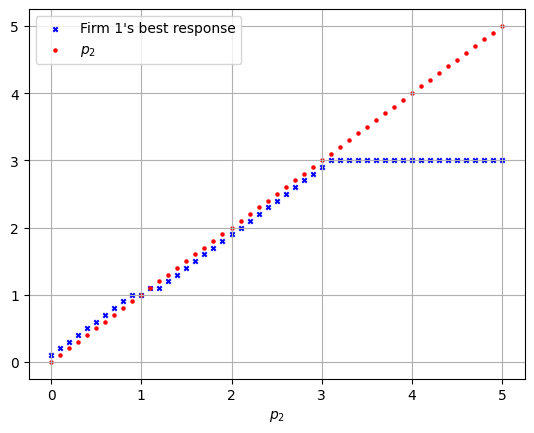

In [9]:
### Verify the solution
p1 = np.arange(0, 5.1, 0.1)
p2 = np.arange(0, 5.1, 0.1)

p1_stack = np.stack([p1]*len(p2))
d1 = np.clip(5 - p1_stack, a_min=0, a_max=None)
D1 = d1.copy()

# Case when p1 = p2
idx = p1_stack == p2.reshape(-1, 1)
D1[idx] =  D1[idx] * 0.5

# Case when p1 > p2
idx = p1_stack > p2.reshape(-1, 1)
D1[idx] =  0

R1 = D1 * (p1_stack - 1)
best_response_1 = np.argmax(R1, axis=1)

plt.grid(True)
plt.scatter(p2, p1[best_response_1], s=10, c='b', marker='x', label="Firm 1's best response")
plt.scatter(p2, p2, s=5, c='r', label='$p_2$')
plt.xlabel('$p_2$')
plt.legend()

The result aligns with the analytic solution.

<div style='border: 1px solid; padding: 5px;'>

**(b)** Based on the best-repsonse function derived in 5.a, use Python to implement the following learning method to reach the Nash equilibria and compare the results:

* Iterative best response: start with a random joint price, and at each time step, only one agent takes the best response price against the opponent's previous price. Agents then take prices iteratively until convergence. The price value can only have one decimal place, such as 4.3, 4.4, and 4.5. You need to output the price adjustment process, the final converged action, and the final reward. (Run multiple times to try different price initialisations, which can help you check the implementation). **[4 marks]**

</div>

In [38]:
def best_response(p):
    if p > 3:
        best = 3
    elif 1.1 < p <= 3:
        best = p - 0.1
    elif 1 < p <= 1.1:
        best = p
    elif p <= 1:
        best = 1
    return best


def reward(p1, p2, c1=1.0):
    if p1 < 5:
        d1 = 5 - p1
    else:
        d1 = 0
    if p1 < p2:
        D1 = d1
    elif p1 == p2:
        D1 = d1 * 0.5
    else:
        D1 = 0
    R1 = D1 * (p1 - c1)
    return R1


def q5_simulate(initial_p1=None, initial_p2=None, max_rounds=100):
    if initial_p1 is not None and initial_p2 is not None:
        prices = np.array([initial_p1, initial_p2]).astype(float)
    else:
        possible_price = np.arange(0, 10.1, 0.1)
        prices = np.random.choice(possible_price, size=2)

    turn_player = 0  # Start with player 0
    for i in range(max_rounds):
        old_prices = prices.copy()
        oppo_price = prices[1 - turn_player]
        # Update turn player's price based on opponent's price
        prices[turn_player] = best_response(oppo_price)
        # Log the change
        print(f'Round {i:03d} (firm {turn_player}\'s move): {old_prices} -> {prices}')
        # Check convergence
        if (prices == old_prices).sum() == 2:
            break
        # Switch player
        turn_player = 1 - turn_player

    print()
    print(f'Final price p_1  : {prices[0]:.1f}')
    print(f'Final price p_2  : {prices[1]:.1f}')
    print(f'Firm 1 reward R_1: {reward(prices[0], prices[1]):.4f}')
    print(f'Firm 2 reward R_2: {reward(prices[1], prices[0]):.4f}')

    return prices

In [56]:
prices = q5_simulate(initial_p1=2, initial_p2=2.5)
print(f'Nash Equilibrium: {prices}')

Round 000 (firm 0's move): [2.  2.5] -> [2.4 2.5]
Round 001 (firm 1's move): [2.4 2.5] -> [2.4 2.3]
Round 002 (firm 0's move): [2.4 2.3] -> [2.2 2.3]
Round 003 (firm 1's move): [2.2 2.3] -> [2.2 2.1]
Round 004 (firm 0's move): [2.2 2.1] -> [2.  2.1]
Round 005 (firm 1's move): [2.  2.1] -> [2.  1.9]
Round 006 (firm 0's move): [2.  1.9] -> [1.8 1.9]
Round 007 (firm 1's move): [1.8 1.9] -> [1.8 1.7]
Round 008 (firm 0's move): [1.8 1.7] -> [1.6 1.7]
Round 009 (firm 1's move): [1.6 1.7] -> [1.6 1.5]
Round 010 (firm 0's move): [1.6 1.5] -> [1.4 1.5]
Round 011 (firm 1's move): [1.4 1.5] -> [1.4 1.3]
Round 012 (firm 0's move): [1.4 1.3] -> [1.2 1.3]
Round 013 (firm 1's move): [1.2 1.3] -> [1.2 1.1]
Round 014 (firm 0's move): [1.2 1.1] -> [1.1 1.1]
Round 015 (firm 1's move): [1.1 1.1] -> [1.1 1.1]

Final price p_1  : 1.1
Final price p_2  : 1.1
Firm 1 reward R_1: 0.1950
Firm 2 reward R_2: 0.1950
Nash Equilibrium: [1.1 1.1]


In [57]:
prices = q5_simulate(initial_p1=5, initial_p2=0.2)
print(f'Nash Equilibrium: {prices}')

Round 000 (firm 0's move): [5.  0.2] -> [1.  0.2]
Round 001 (firm 1's move): [1.  0.2] -> [1. 1.]
Round 002 (firm 0's move): [1. 1.] -> [1. 1.]

Final price p_1  : 1.0
Final price p_2  : 1.0
Firm 1 reward R_1: 0.0000
Firm 2 reward R_2: 0.0000
Nash Equilibrium: [1. 1.]


<div style='border: 1px solid; padding: 5px;'>

**(c)** Given the example shown in 5.a, derive the analytical best-response price for the $N$ firms case. You need to write down the whole procedures from the problem formulation to the final answer, similar with that in 5.a question. The price value does **not** need to have one decimal place. **[2 marks]**

</div>

**Problem Formulation of the $N$ firms Case:**

Consider a market with $N$ firms ($N$ players) selling a homogeneous good. These firms all have the same cost structure and all produce any quantity at the same cost. The market price is determined by the lowest price offered by any of these $N$ firms.

These firms are indexed by $i \in \{1, 2, ..., N\}$. They have the same constant marginal cost $c \geq 0$ and $p_i \geq 0$ is the price level set by firm $i$. Denote $P = \{p_1, p_2, ..., p_N\}$ as the set of all price levels set.

The demand function $D_i$ for firm $i$ given $P$ is derived as
$$
	D_i(P) =
	\begin{cases}
		d(p_i) / n_\text{min} & \text{if } p_i \leq p_j :\forall j \neq i \\
		0 & \text{otherwise}
	\end{cases}
$$
where $n_\text{min}$ is the number of elements in $P$ that is equal to $\min P$ and $d(p_i)$ is defined as
$$
	d(p_i) =
	\begin{cases}
		5-p_i & \text{if } p_i<5 \\
		0 & \text{if } p_i\geq 5 \\
	\end{cases} \quad .
$$
The reward function $R_i$ for firm $i$ is therefore computed by
$$
	R_{i}= D_i(P) \times (p_i - 1)
$$
where we have chosen $c = 1$ as in question part 5(a).

**Analytical Best Response**:

We would derive the analytical best response for firm 1 given the price levels $p_2$, $p_3$, ..., $p_N$ set by other firms.

Denote $P' = \{p_2, p_3, ..., p_N\}$ and $n_\text{min}$ as the number of elements in $P'$ that are equal to $\min P'$.

Similar to that in part 5(a), the reward of firm 1 can be constructed as
$$
R_1 =
\begin{cases}
	(5-p_1)(p_1-1)  &  \text{if } p_1 < 5 \text{ and } p_1 < \min P' \\
	(5-p_1)(p_1-1)/n_\text{min}  &  \text{if } p_1 < 5 \text{ and } p_1 = \min P' \\
	0  &  \text{otherwise}
\end{cases}
$$
Most part of the derivation follows from that in part 5(a) and we can simply obtain the following three cases on firm 1 best response $p_1^*$:
- For $0 \leq \min P' < 1$,
$$
p_1^* = \text{any value within } (\min P', \infty)
$$
- For $p_2 = 1$,
$$
p_1^* = \text{any value within } [1, \infty)
$$
- For $\min P' > 3$,
$$
p_1^* = 3
$$

For the range of $1 \leq \min P' \leq 3$, as there is no restriction on the prices to have only one decimal place, firm 1's best response is to set $p_1$ to a number that is smaller than $\min P'$ but closest to $\min P'$. It depends on the smallest unit supported by the price.

Hence, the best response $p_1^*$ of firm 1 given $\{p_2, p_3, ..., p_N\}$ is summarised as
$$
	p_1^* =
	\begin{cases}
		\text{any value within } (\min P', \infty) & \text{if } 0 \leq \min P' < 1 \\
        \text{any value within } [1, \infty) & \text{if } \min P' = 1 \\
		\min P' - \delta & \text{if } 1 < \min P' \leq 3 \\
		3 & \text{if } \min P' > 3
	\end{cases}
	\quad ,
$$
where $P' = \{p_2, p_3, ..., p_N\}$ and $\delta$ is the smallest unit of the price.

<div style='border: 1px solid; padding: 5px;'>

**(d)** Let us consider the situation when two firms sell a **different good**. In this case, the firm that offer lower price cannot capture all the market demand. We assume that the market demand $d$ is a function of $p_1,p_2$, which means that the market demand is influnced by two prices. Assume that:
$$
\begin{align*}
d_1(p_1,p_2) &= 10 - 2p_1 + 4p_2 \\
d_2(p_1,p_2) &= 5 - 3p_2 + 2p_1
\end{align*}
$$
The reward function is defined as:
$$
R_{i}= d_{i}(p_i - c_i)
$$
Assume $c_1=c_2=1.0$, derive the analytical nash equilibrium prices and the final rewards for these two firms. **[2 marks]**

</div>

Rewards of the firms are given by
$$
\begin{cases}
    R_1 = (10 - 2p_1 + 4p_2)(p_1 - 1) \\
    R_2 = (5 - 3p_2 + 2p_1)(p_2 - 1)
\end{cases}
\Rightarrow
\begin{cases}
    R_1 = -2p_1^2 + 12p_1 +4p_1p_2 - 4p_2 - 10 \\
    R_2 = -3p_2^2 + 8p_2 + 2p_1p_2 - 2p_1 - 5
\end{cases}
$$
The optimal prices for each firm can be obtained by considering the following first order condition:
$$
\begin{align}
	\frac{\partial}{\partial p_1} R_1 = 0
	&\Rightarrow -4p_1 + 12 + 4p_2 = 0
	\\
	\frac{\partial}{\partial p_1} R_2 = 0
	& \Rightarrow -6p_2 + 8 + 2p_1 = 0
\end{align}
$$
Solving the two equations yields the optimal prices $p_1^* = 6.5$ and $p_2^* = 3.5$, which are the Nash equilibrium prices. The corresponding final rewards are $R_1^* = 60.5$ and $R_2^* = 18.75$.